## Car Price Prediction 
## By-Prathamesh Dubbewar

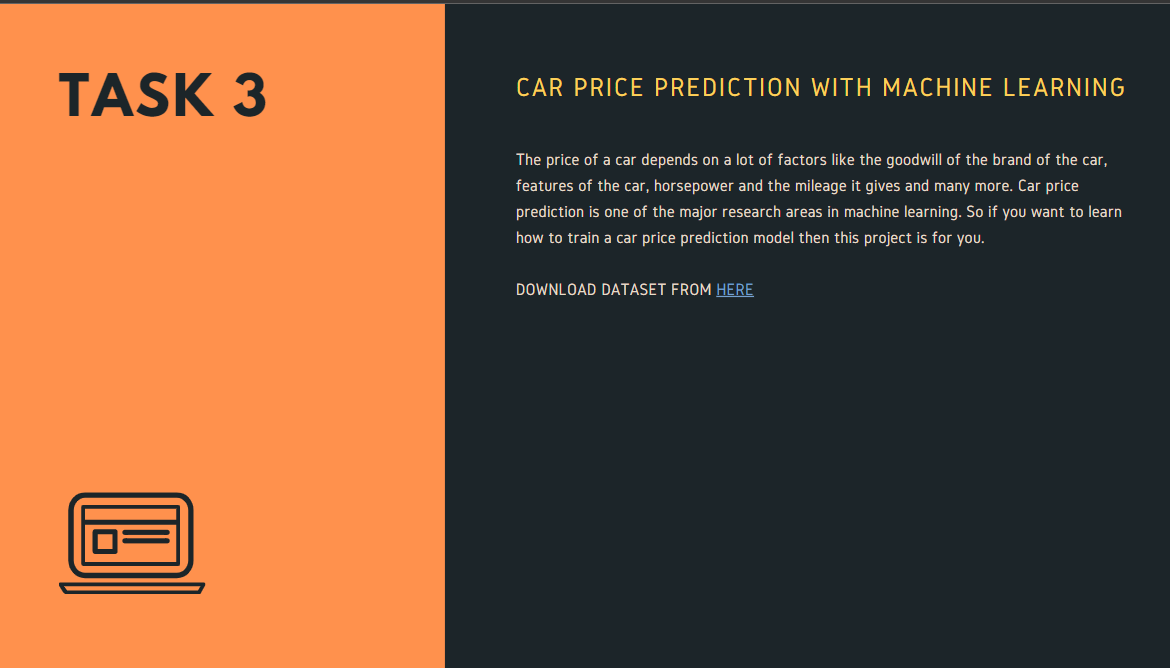

In [1]:
import numpy as np
import pandas as pd

In [2]:
hf=pd.read_csv('CarPrice.csv')

In [3]:
hf

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
hf.sample(5)

,name,company,year,Price,kms_driven,fuel_type
350,Hyundai i10,Hyundai,2012,"2,44,999","38,000 kms",Petrol
171,Honda City 1.5 V MT,Honda,2014,"5,49,000","39,000 kms",Petrol
804,Tata Sumo Gold FX BSIII,Tata,2013,"2,15,000","1,00,000 kms",Petrol
178,Honda Amaze,Honda,2013,"2,84,999","46,000 kms",Diesel
91,Honda City 1.5 EXi New,Honda,2005,"90,000","50,000 kms",Petrol


In [5]:
hf.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [6]:
backup=hf.copy()

In [7]:
hf.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [8]:
# Remove nulls
hf=hf[~hf['fuel_type'].isna()]

In [9]:
hf.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [10]:
hf.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
832,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
833,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
834,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
835,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [11]:
hf=hf[hf['year'].str.isnumeric()]

In [12]:
hf['year']=hf['year'].astype(int)

In [13]:
hf=hf[hf['Price']!="Ask For Price"]
hf

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [14]:
# make price int
hf['Price']=hf['Price'].str.replace(',','').astype(int)

In [15]:
hf['kms_driven']=hf['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [16]:
hf=hf[hf['kms_driven'].str.isnumeric()]
hf['kms_driven']=hf['kms_driven'].astype(int)

In [17]:
hf.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [18]:
hf['name']=hf['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [19]:
hf.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [20]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [21]:
hf.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [22]:
hf=hf[hf['Price']<6e6].reset_index(drop=True)
hf

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [23]:
x=hf.drop(columns='Price')
y=hf['Price']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
y_train.head()

669    690000
322    210000
156    275000
79     375000
588    210000
Name: Price, dtype: int64

In [26]:
x_train.head()

,name,company,year,kms_driven,fuel_type
669,Maruti Suzuki Baleno,Maruti,2018,1000,Petrol
322,Chevrolet Sail UVA,Chevrolet,2013,60000,Petrol
156,Toyota Etios GD,Toyota,2013,24800,Petrol
79,Mahindra Quanto C8,Mahindra,2013,20000,Diesel
588,Tata Sumo Gold,Tata,2012,75000,Diesel


In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
hf1=OneHotEncoder()
hf1.fit(hf[['name','company','fuel_type']])

OneHotEncoder()

In [28]:
from sklearn.compose import make_column_transformer
column_trans= make_column_transformer((OneHotEncoder(categories=hf1.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')

In [29]:
import sys
!{sys.executable} -m pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 9.8 MB/s eta 0:00:0000:0100:01


In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
import math
from sklearn.pipeline import make_pipeline

In [32]:
xgbr=XGBRegressor()
pipe=make_pipeline(column_trans,xgbr)
pipe.fit(x_train,y_train)
y_pred_xgbr=pipe.predict(x_test)
r2=r2_score(y_test,y_pred_xgbr)
r2

0.71432391904829

In [34]:
score=[]
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    xgbr=XGBRegressor()
    pipe=make_pipeline(column_trans,xgbr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    score.append(r2_score(y_test,y_pred))
score[np.argmax(score)]        

0.887748087736036

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(score))
xgbr=XGBRegressor()
pipe=make_pipeline(column_trans,xgbr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.887748087736036

In [36]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],
            columns=['name','company','year','kms_driven','fuel_type'])) 

array([538705.3], dtype=float32)

In [37]:
pipe.predict(pd.DataFrame([['Ford Figo','Ford',2014,175000,'Diesel']],
            columns=['name','company','year','kms_driven','fuel_type'])) 

array([372975.78], dtype=float32)

In [41]:
import pickle
pickle.dump(pipe,open('car_price.pkl','wb'))